<a href="https://colab.research.google.com/github/sinapordanesh/PyTorch_Lab/blob/main/islp/Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 850.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=688a8245de76e413ad6f48820e37fc603db986ebf9b2eab0510e3f8f68baedc7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [2]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

In [3]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

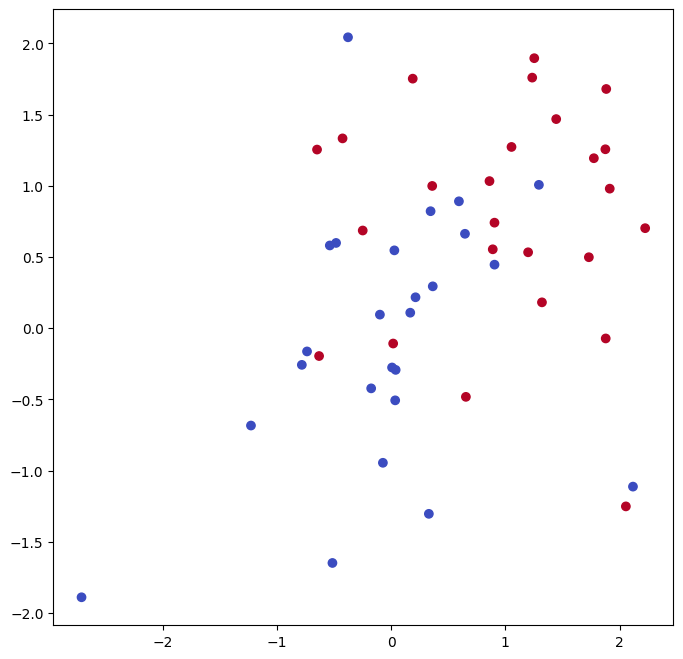

In [4]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [5]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

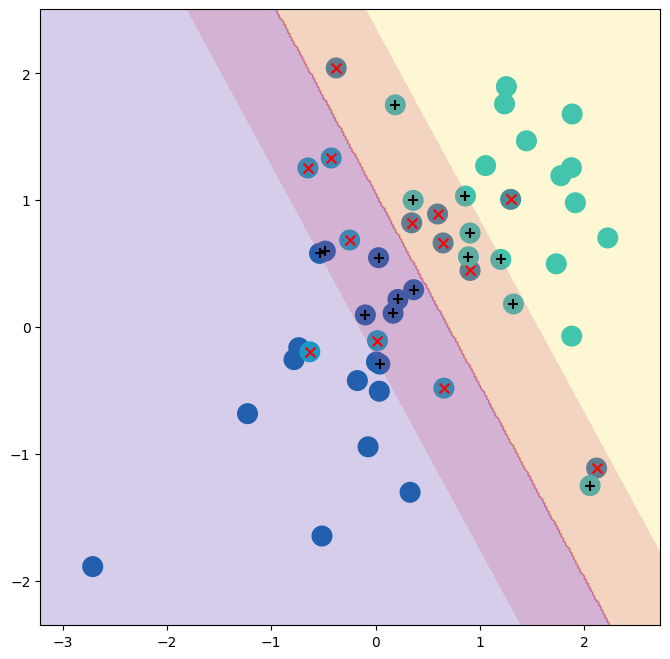

In [6]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear ,
ax=ax)

In [7]:
In [8]: svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [9]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True ,
cv=kfold ,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [10]:
In [10]: grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test==1] += 1

In [12]:
X_test = rng.standard_normal((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test==1] += 1

In [13]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,10,2
1,0,8


In [14]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)


Truth,-1,1
Predicted,,
-1,4,0
1,6,10


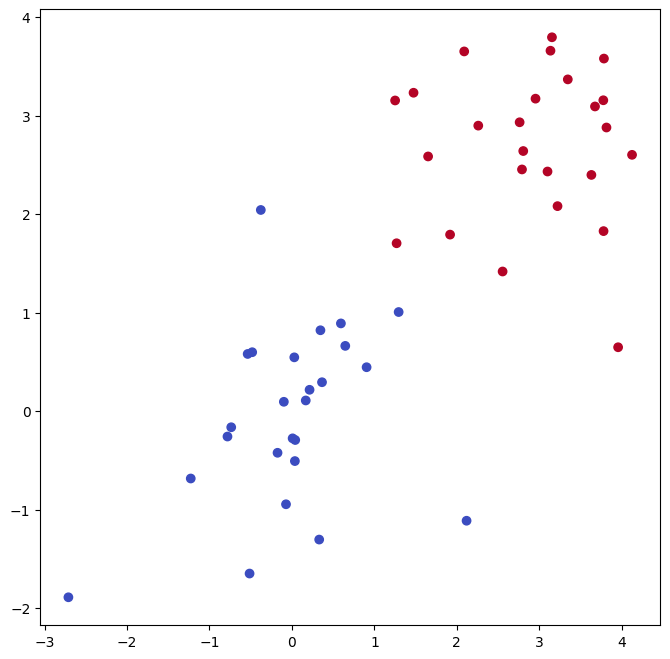

In [15]:
X[y==1] += 1.9;
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [16]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


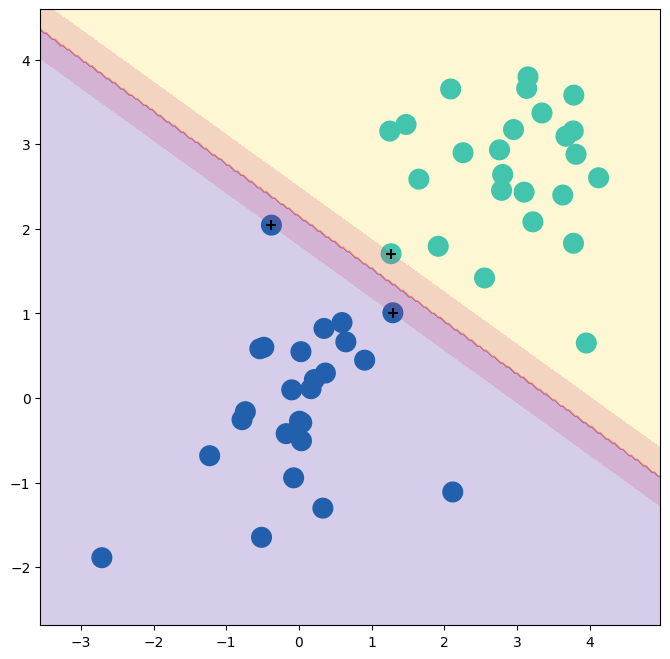

In [17]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [18]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


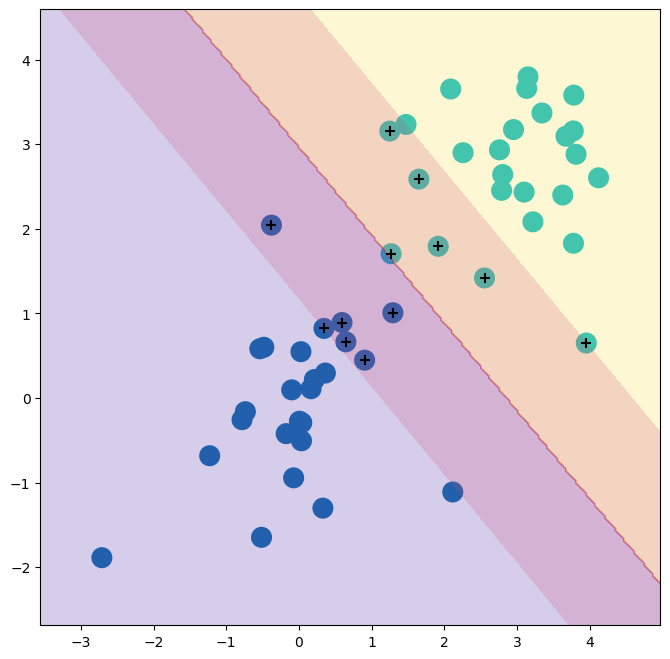

In [19]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_ ,
ax=ax)

In [20]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

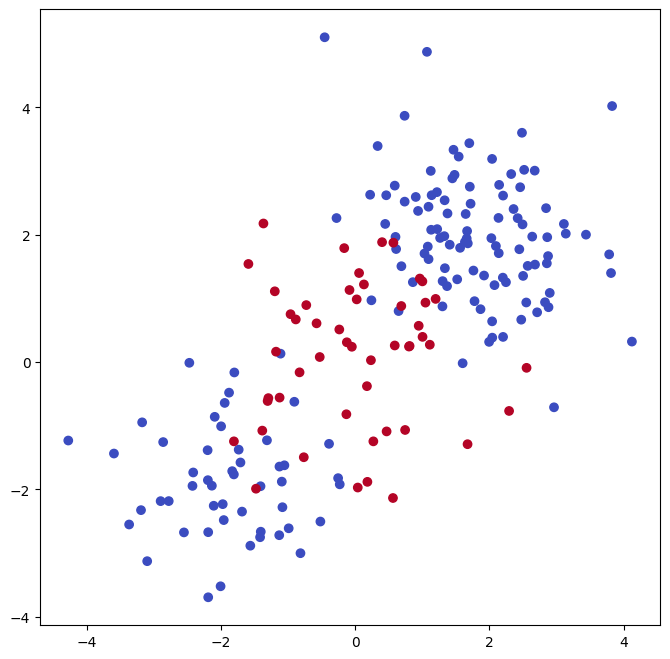

In [21]:
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [22]:
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

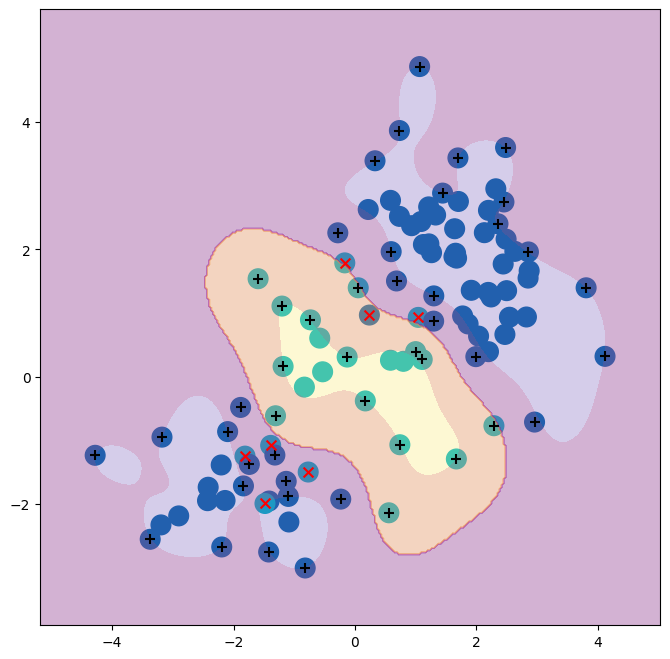

In [23]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

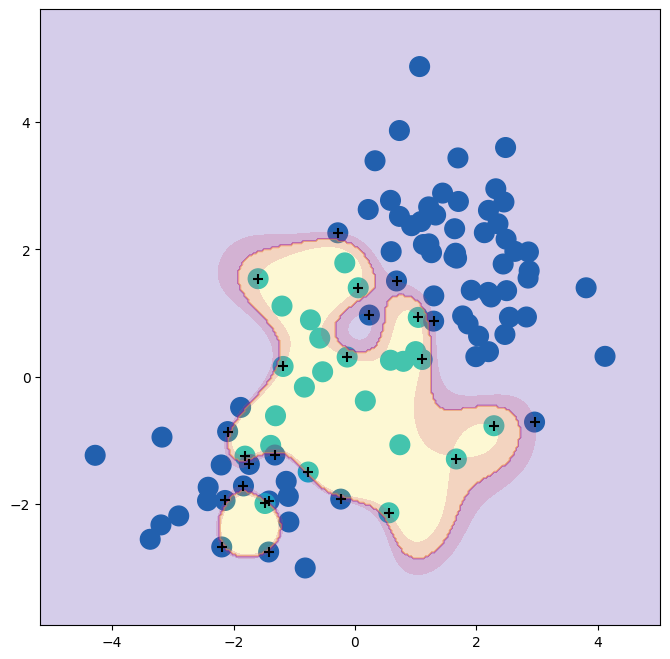

In [25]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
y_train ,
svm_rbf ,
ax=ax)

In [26]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True ,
cv=kfold ,
scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,71,8
2,4,17


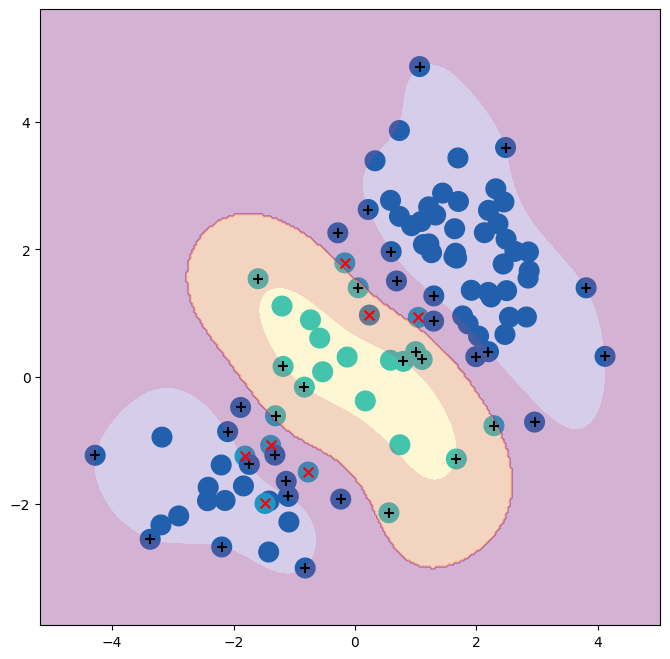

In [27]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,y_train ,
best_svm ,
ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

In [31]:
In [3]: roc_curve = RocCurveDisplay.from_estimator # shorthand


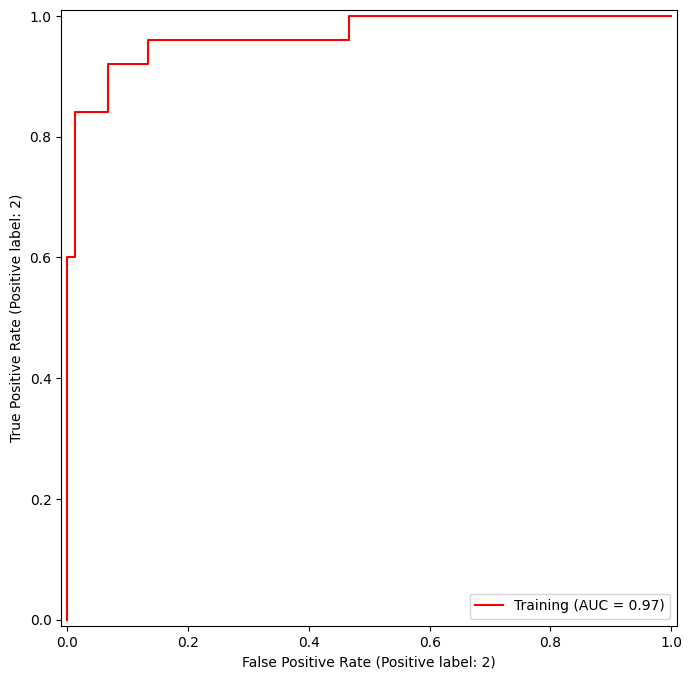

In [32]:
fig , ax = subplots(figsize=(8,8))
roc_curve(best_svm ,
X_train ,
y_train ,
name='Training',
color='r',
ax=ax);

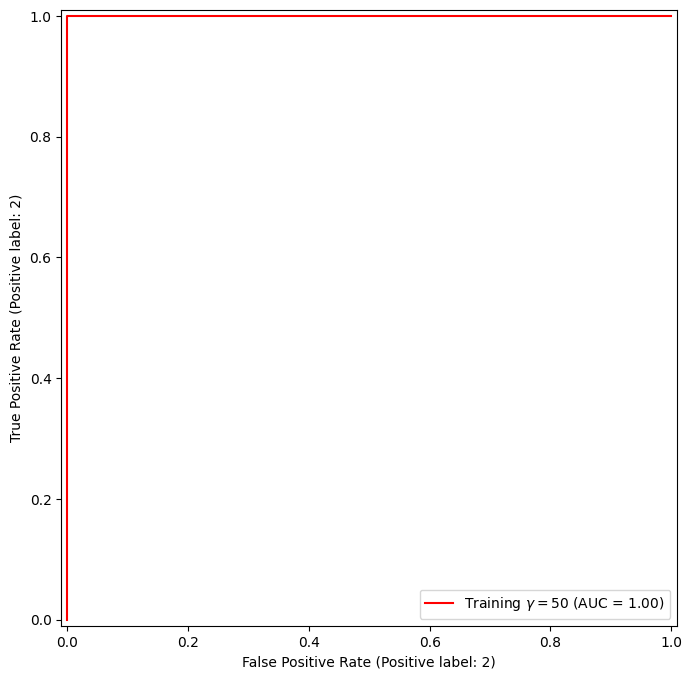

In [33]:
svm_flex = SVC(kernel="rbf",
gamma=50,C=1)
svm_flex.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
roc_curve(svm_flex ,
X_train ,
y_train ,
name='Training $\gamma=50$',
color='r',
ax=ax);

In [34]:
roc_curve(svm_flex ,
X_test ,
y_test ,
name='Test $\gamma=50$',
color='b',
ax=ax)
fig;


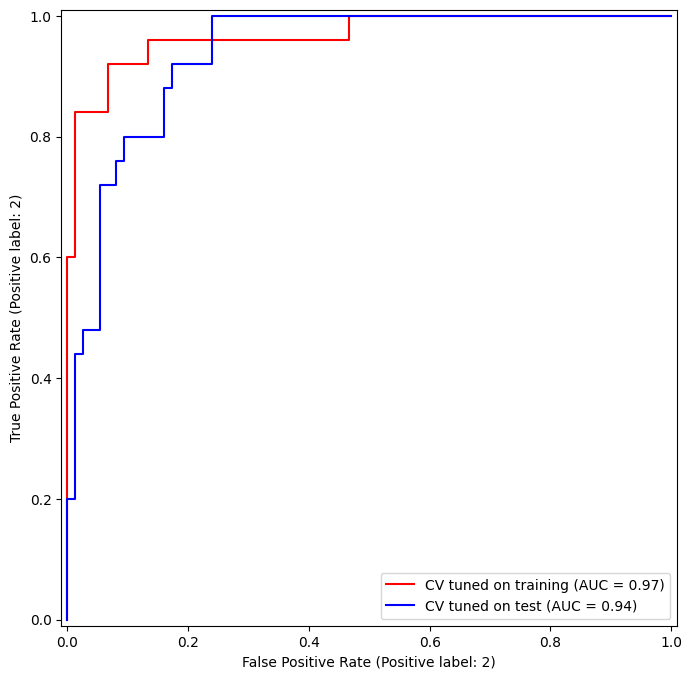

In [36]:
fig , ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
(X_train , X_test),
(y_train , y_test),
('r', 'b'),
('CV tuned on training',
'CV tuned on test')):
  roc_curve(best_svm ,
  X_,
  y_,
  name=name ,
  ax=ax,
  color=c)

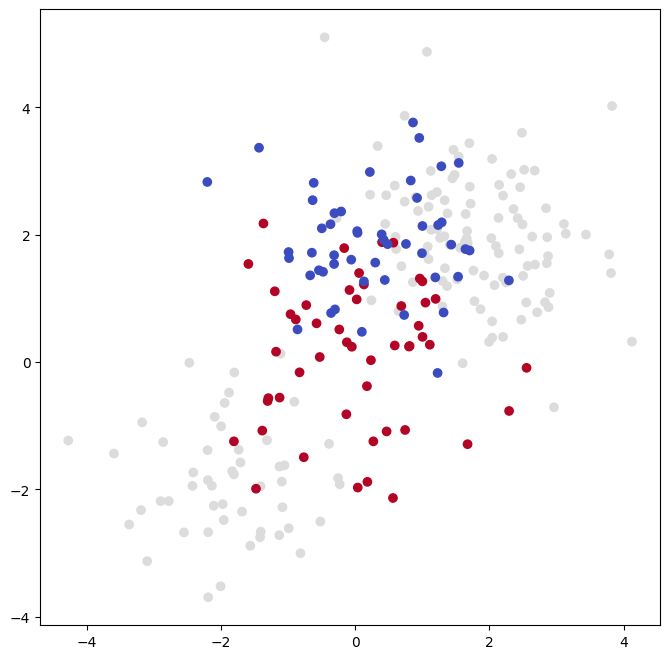

In [37]:
rng = np.random.default_rng (123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

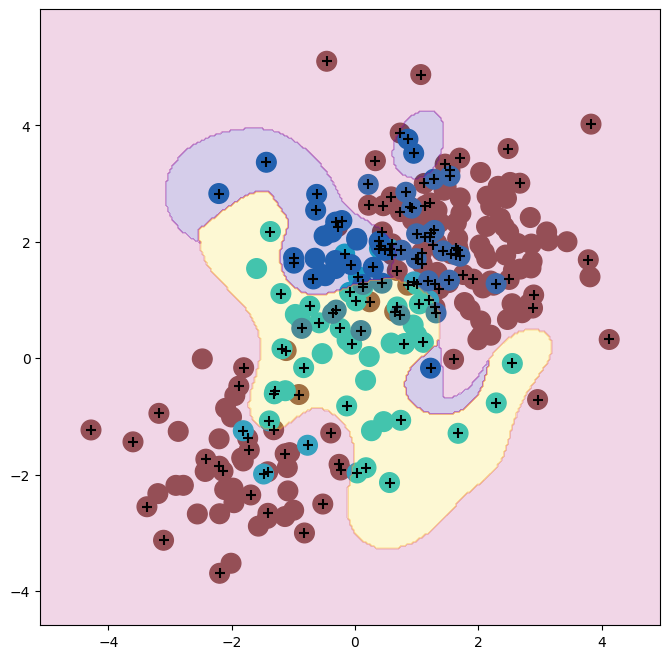

In [38]:
svm_rbf_3 = SVC(kernel="rbf",
C=10,
gamma=1,
decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_rbf_3 ,
scatter_cmap=cm.tab10 ,
ax=ax)

In [39]:
Khan = load_data('Khan')
Khan['xtrain'].shape , Khan['xtest'].shape

((63, 2308), (20, 2308))

In [40]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [41]:
confusion_table(khan_linear.predict(Khan['xtest']),
Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
